In [27]:
#https://am207.github.io/2017/wiki/lab4.html

import time
import random
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)
%matplotlib inline
import matplotlib.pyplot as plt

# Optimization

# Motivating Simulated Annealing

## temperature

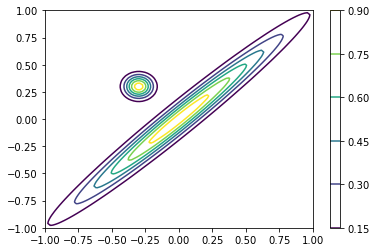

In [6]:
# Let's plot a target distribution p(x,y) 
ee=0.01
p = lambda x,y: np.exp(-(x-y)**2 / (2*ee) - (x+y)**2/2) + np.exp( -(x+.30)**2/0.01)*np.exp( -(y-.30)**2/0.01)

xx= np.linspace(-1,1,100)
yy= np.linspace(-1,1,100)

M = np.empty((100,100))
i=0
for x in xx:
    j=0
    for y in yy:
        M[j,i]=p(x,y)
        j +=1
    i +=1
    
    
plt.contour(xx,yy,M)
plt.colorbar()
plt.show()

メトロポリス - ヘイスティングス（Metropolis-Hastings (MH) ）
Metropolis-Hastings algorithmがこの関数/分布で動作するのかを確認。

In [7]:
# METROPOLIS ALGORITHM 
#create a simple Metropolis Hastings function
def MH_simple(p, n, sig, T, x0, y0):
    x_prev = x0
    y_prev = y0
    x=[x_prev]; y=[y_prev]
    
    k=1
    i=1
    
    while i<n:
        
        x_star = np.random.normal(x_prev, sig)
        y_star = np.random.normal(y_prev, sig)
               
        P_star = p(x_star, y_star)
        P_prev = p(x_prev, y_prev)
        
        U =  np.random.uniform()
        
        E_star = -np.log(P_star)
        E_prev = -np.log(P_prev)
        
        A =  np.exp(-(1.0/T) * (E_star-E_prev))
        if U < A:
            x.append(x_star); y.append(y_star); 
            i = i + 1
            x_prev = x_star; y_prev = y_star
        else :
            x.append(x_prev); y.append(y_prev); 
            #x_prev = x[i] ; y_prev = y[i]  
            i = i + 1
     
            k=k+1
    return np.array(x),np.array(y), k
# number of samples
n = 2000
# step size
sig =.05

#intitialize the sampling. Start somewhere from -1..1
x_start = np.random.uniform(low=-1, high=1)
y_start = np.random.uniform(low=-1, high=1)
xSL, ySL, SLrejected = MH_simple(p, n, sig=sig, T=0.01, x0=x_start, y0=y_start)
print("Number of rejected samples at super low temperature: ")
print(SLrejected)

xL, yL, Lrejected = MH_simple(p, n, sig=sig, T=0.1, x0=x_start, y0=y_start)
print("Number of rejected samples at low temperature: ")
print(Lrejected)

xM, yM, Mrejected = MH_simple(p, n, sig=sig, T=0.7, x0=x_start, y0=y_start)
print("Number of rejected samples at medium temperature: ")
print(Mrejected)

xH, yH, Hrejected = MH_simple(p, n, sig=sig, T=1.0, x0=x_start, y0=y_start)
print("Number of rejected samples at high temperature: ")
print(Hrejected)
      

Number of rejected samples at super low temperature: 
1669
Number of rejected samples at low temperature: 
1055
Number of rejected samples at medium temperature: 
534
Number of rejected samples at high temperature: 
437


/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp


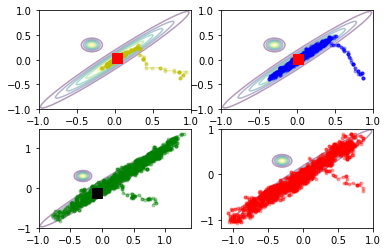

In [8]:
plt.subplot(2,2,1)
plt.contour(xx,yy,M, alpha=0.4)
plt.plot(xSL,ySL, 'y.-', alpha=0.3)
plt.plot(xSL[-1],ySL[-1], 'rs', ms=10)

plt.subplot(2,2,2)
plt.contour(xx,yy,M, alpha=0.4)
plt.plot(xL,yL, 'b.-', alpha=0.3)
plt.plot(xL[-1],yL[-1], 'rs', ms=10)

plt.subplot(2,2,3)
plt.contour(xx,yy,M, alpha=0.4)
plt.plot(xM,yM, 'g.-', alpha=0.3)
plt.plot(xM[-1],yM[-1], 'ks', ms=10)

plt.subplot(2,2,4)
plt.contour(xx,yy,M, alpha=0.4)
plt.plot(xH,yH, 'r.-', alpha=0.3)
plt.plot(xH[-1],yH[-1], 'rs', ms=10)

# The Simulated Annealing Algorithm

メトロポリス - ヘイスティングスを高温でサンプリングして分布を周り、すべての山（谷）を見つけます。温度をゆっくりと冷やすと、最適な地域に集中し、最適な場所を見つけることができます。

1.Lを特定の温度での反復回数とすると、xi、T、L（T）を初期化する。

2.こうしてLLトランジションを実行します（これをエポックと呼びます）。<br>
2-1.新しい提案点xを作成<br>
2-2.もしxが受け入れられた場合　実行<br>


3.TとLをアップデート

4.エポックの数が何か修正されるか、何か基準が達成されるまで２を行う。

# Example from Lecture

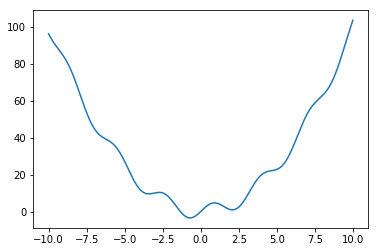

In [47]:
f = lambda x: x**2 + 4*np.sin(2*x)
xs = np.linspace(-10.,10.,1000)
plt.plot(xs, f(xs));

# Cooling Schedule and convergence

In [49]:
distx = lambda g, x: np.e**(-g(x))


(-5, 5)

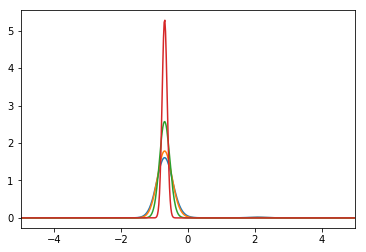

In [48]:
import functools
distx = lambda g, x: np.e**(-g(x))
dxf = functools.partial(distx, f)
outx = np.linspace(-10, 10,1000)
import scipy.integrate as integrate
O=20
plt.plot(outx, dxf(outx)/integrate.quad(dxf,-O, O)[0]);
A=integrate.quad(lambda x: dxf(x)**1.2,-O, O)[0]
plt.plot(outx, (dxf(outx)**1.2)/A);
B=integrate.quad(lambda x: dxf(x)**2.4,-O, O)[0]
plt.plot(outx, (dxf(outx)**2.4)/B);
C=integrate.quad(lambda x: dxf(x)**10,-O, O)[0]
plt.plot(outx, (dxf(outx)**10)/C);


plt.xlim([-5,5])
# plt.xscale('log')
# plt.yscale('log')


# Traveling Salesman Problem (TSP)

In [31]:
def alltours_tsp(cities):
    "Generate all possible tours of the cities and choose the shortest tour."
    return shortest_tour(alltours(cities))

def shortest_tour(tours): 
    "Choose the tour with the minimum tour length."
    return min(tours, key=tour_length)

# Representing Tours

In [41]:
import itertools

def alltours(cities):
    "Return a list of tours, each a permutation of cities, but each one starting with the same city."
    start = first(cities)
    return [[start] + Tour(rest)
            for rest in itertools.permutations(cities - {start})]

def first(collection):
    "Start iterating over collection, and return the first element."
    return next(iter(collection))

Tour = list  # Tours are implemented as lists of cities
def tour_length(tour):
    "The total of distances between each pair of consecutive cities in the tour."
    return sum(distance(tour[i], tour[i-1]) 
               for i in range(len(tour)))

# Representing Points and Computing distance

In [42]:
# Cities are represented as Points, which are a subclass of complex numbers

class Point(complex):
    x = property(lambda p: p.real)
    y = property(lambda p: p.imag)
    
City = Point

def distance(A, B): 
    "The distance between two points."
    return abs(A - B)

def Cities(n, width=900, height=600, seed=42):
    "Make a set of n cities, each with random coordinates within a (width x height) rectangle."
    random.seed(seed * n)
    return frozenset(City(random.randrange(width), random.randrange(height))
                     for c in range(n))

def plot_tour(tour):
    "Plot the cities as circles and the tour as lines between them. Start city is red square."
    start = tour[0]
    plot_lines(list(tour) + [start])
    plot_lines([start], 'rs') # Mark the start city with a red square
    
def plot_lines(points, style='bo-'):
    "Plot lines to connect a series of points."
    plt.plot([p.x for p in points], [p.y for p in points], style)
    plt.axis('scaled'); plt.axis('off')
    
def plot_tsp(algorithm, cities):
    "Apply a TSP algorithm to cities, plot the resulting tour, and print information."
    # Find the solution and time how long it takes
    t0 = time.clock()
    tour = algorithm(cities)
    t1 = time.clock()
    assert valid_tour(tour, cities)
    plot_tour(tour); plt.show()
    print("{} city tour with length {:.1f} in {:.3f} secs for {}"
          .format(len(tour), tour_length(tour), t1 - t0, algorithm.__name__))
    
def valid_tour(tour, cities):
    "Is tour a valid tour for these cities?"
    return set(tour) == set(cities) and len(tour) == len(cities)

# Heuristics

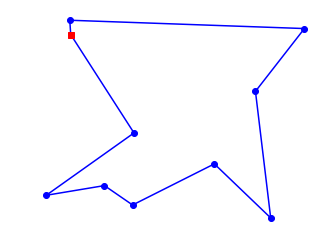

10 city tour with length 2043.1 in 2.569 secs for alltours_tsp


In [45]:
import itertools

def nn_tsp(cities):
    """Start the tour at the first city; at each step extend the tour 
    by moving from the previous city to the nearest neighboring city, C,
    that has not yet been visited."""
    start = first(cities)
    tour = [start]
    unvisited = set(cities - {start})
    while unvisited:
        C = nearest_neighbor(tour[-1], unvisited)
        tour.append(C)
        unvisited.remove(C)
    return tour

def nearest_neighbor(A, cities):
    "Find the city in cities that is nearest to city A."
    return min(cities, key=lambda c: distance(c, A))
plot_tsp(alltours_tsp, Cities(10, seed=332))

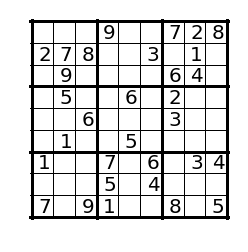

In [9]:
def plot_sudoku(n):
    # Simple plotting statement that ingests a 9x9 array (n), and plots a sudoku-style grid around it.
    plt.figure()
    for y in range(10):
        plt.plot([-0.05,9.05],[y,y],color='black',linewidth=1)
        
    for y in range(0,10,3):
        plt.plot([-0.05,9.05],[y,y],color='black',linewidth=3)
            
    for x in range(10):
        plt.plot([x,x],[-0.05,9.05],color='black',linewidth=1)
    
    for x in range(0,10,3):
        plt.plot([x,x],[-0.05,9.05],color='black',linewidth=3)

    plt.axis('image')
    plt.axis('off') # drop the axes, they're not important here

    for x in range(9):
        for y in range(9):
            foo=n[8-y][x] # need to reverse the y-direction for plotting
            if foo > 0: # ignore the zeros
                T=str(foo)
                plt.text(x+0.3,y+0.2,T,fontsize=20)

    plt.show()
sudoku_hard=np.array([[0,0,0,9,0,0,7,2,8],
                      [2,7,8,0,0,3,0,1,0],
                      [0,9,0,0,0,0,6,4,0],
                      [0,5,0,0,6,0,2,0,0],
                      [0,0,6,0,0,0,3,0,0],
                      [0,1,0,0,5,0,0,0,0],
                      [1,0,0,7,0,6,0,3,4],
                      [0,0,0,5,0,4,0,0,0],
                      [7,0,9,1,0,0,8,0,5]])
plot_sudoku(sudoku_hard)

#sudoku_easy=np.array([[0,0,0,0,0,0,1,0,0],
#                      [0,0,0,7,0,0,0,9,4],
#                      [4,0,0,1,0,0,2,0,0],
#                      [0,2,0,8,0,0,3,5,0],
#                      [5,9,0,0,0,0,0,2,6],
#                      [0,6,8,0,0,5,0,7,0],
#                      [0,0,9,0,0,6,0,0,2],
#                      [8,1,0,0,0,3,0,0,0],
#                      [0,0,5,0,0,0,0,0,0]])
#plot_sudoku(sudoku_easy)